In [4]:
import os
import struct
import numpy as np
import matplotlib as mpl
import scipy as sp
import scipy.sparse
from matplotlib import pyplot

#Function to read from MNIST data
def read(dataset = "training", path = "."):
    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        _, _ = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        _, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    return (lbl, img)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

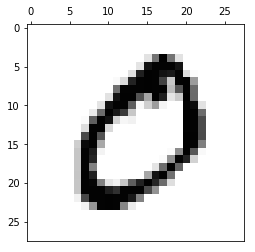

0


In [7]:
#Reading Training Data and Test Data
[trainLabels,trainSet]=read(dataset = "training", path = ".")
[testLabels,testSet]=read(dataset = "testing", path = ".")
show(trainSet[1])
print(trainLabels[1])

In [1]:
#Preprocessing Training Data and Test Data:
# 1- Changing shape of each sample data from 28*28 to 1*784
# 2- Dividing each pixel magnitude in sampe by 255
trainVec=np.zeros(shape=(len(trainSet),784),dtype=float)
testVec=np.zeros(shape=(len(testSet),784),dtype=float)

for i in range(len(trainSet)):
    trainVec[i]=np.reshape(trainSet[i]/255,(1,784))
for i in range(len(testSet)):
    testVec[i]=np.reshape(testSet[i]/255,(1,784))
    
#Function to predict Class probabilities given weight vector and Sample Data
#P(Y|Xi)=e^(W'Xi)/(1+sum(e^(W'Xi))) where i=0,8; P(Y|Xi)=1/(1+sum(e^(W'Xi))) where i=9
def predict(weightVectors,featureVector):
    fV=featureVector.reshape(1,784)
    classProb=np.zeros(shape=(10,1),dtype=float)
    classProb[0:-1]=np.exp(np.matmul(weightVectors,fV.transpose()))
    classProb[-1]=1
    classProb=classProb/sum(classProb)
    return classProb

#Initializing weight vector(9x784) to all 0s
weightVectors=np.zeros(shape=(9,784),dtype=float)

weightUpdate=np.zeros(shape=(9,784),dtype=float)
runs=100
learningRate=0.4
Y=np.zeros(shape=(9,1),dtype=float)

#Y contains class labels 0 to 9, which will be compared with sample class label
# to return 1 or 0
for i in range(0,9):
    Y[i]=i;

Accuracy=list()
while(runs>0):
    runs=runs-1
    #weightUpdate=np.zeros(shape=(9,784),dtype=float)
    count=0
    for i in range(len(trainSet)):
        #update per sample = alpha*Xl = n*P(Yl=1 | Xl,w)*Xl
        alpha=learningRate*(np.equal(Y,trainLabels[i])-predict(weightVectors,trainVec[i])[0:-1])/len(trainLabels)
        weightUpdate=weightUpdate+alpha*trainVec[i].reshape(1,784).repeat(9,axis=0)
    #weightVectors=weightVectors+weightUpdate
    weightVectors=weightUpdate

    for i in range(len(testSet)):
        if(predict(weightVectors,testVec[i]).argmax(axis=0)==testLabels[i]):
            count=count+1
    Accuracy.append(count/len(testLabels))
    print("Run: "+str(100-runs)+"; Accuracy: "+str(count/len(testLabels)))

Run: 1; Accuracy: 0.6299
Run: 2; Accuracy: 0.721
Run: 3; Accuracy: 0.7274
Run: 4; Accuracy: 0.7453
Run: 5; Accuracy: 0.7499
Run: 6; Accuracy: 0.7564
Run: 7; Accuracy: 0.7613
Run: 8; Accuracy: 0.7647
Run: 9; Accuracy: 0.7682
Run: 10; Accuracy: 0.7705
Run: 11; Accuracy: 0.772
Run: 12; Accuracy: 0.7762
Run: 13; Accuracy: 0.7796
Run: 14; Accuracy: 0.7828
Run: 15; Accuracy: 0.7864
Run: 16; Accuracy: 0.7913
Run: 17; Accuracy: 0.7947
Run: 18; Accuracy: 0.7992
Run: 19; Accuracy: 0.8036
Run: 20; Accuracy: 0.8086
Run: 21; Accuracy: 0.8131
Run: 22; Accuracy: 0.8176
Run: 23; Accuracy: 0.8221
Run: 24; Accuracy: 0.8275
Run: 25; Accuracy: 0.8322
Run: 26; Accuracy: 0.8354
Run: 27; Accuracy: 0.8387
Run: 28; Accuracy: 0.8423
Run: 29; Accuracy: 0.8456
Run: 30; Accuracy: 0.8482
Run: 31; Accuracy: 0.8499
Run: 32; Accuracy: 0.8526
Run: 33; Accuracy: 0.8541
Run: 34; Accuracy: 0.8567
Run: 35; Accuracy: 0.8583
Run: 36; Accuracy: 0.8597
Run: 37; Accuracy: 0.8607
Run: 38; Accuracy: 0.8627
Run: 39; Accuracy: 0.86

Text(0,0.5,'Accuracy')

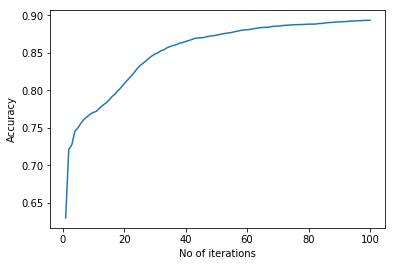

In [3]:
Run=list()
for i in range(100):
    Run.append(i+1)
pyplot.plot(Run,Accuracy)
pyplot.xlabel('No of iterations')
pyplot.ylabel('Accuracy')